# Área de pruebas y juegos

En este documento es posible hacer pruebas rápidas de código en Python. Aquí están los fragmentos de código incluidos en el enunciado del proyecto.

> Nota: es necesario seleccionar el "kernel" de Python que va a ejecutar este código localmente. Típicamente será el kernel provisto por la instalación de Anaconda.

## Ejemplo de uso de `requests`

In [ ]:
import requests

# Usuario(a) de GitHub
usuario = "fabianabarca"

# Construir la URL
api_url = "https://api.github.com/users/" + usuario

# Hacer la solicitud GET y guardar un "Response" en la variable r
r = requests.get(api_url)

# Convertir la información obtenida en JSON
datos = r.json()

# Extraer y mostrar algún dato particular con la llave "company"
print("Compañía:", datos["company"])

## Ejemplo básico de Pandas

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    "Nombre": ["Andrés", "Brenda", "Carlos"],
    "Edad": [17, 21, 22],
    "Ciudad": ["Heredia", "Puntarenas", "Guanacaste"],
}
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

# Obtener el promedio de edad
promedio_edad = df["Edad"].mean()
print("Promedio de edad:", promedio_edad)

## Ejemplos de gráficas

Tres paquetes de graficación:

- Matplotlib
- Seaborn
- Plotly

### Matplotlib

#### Función matemática con Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar los datos
ax.plot(x, y)

# Personalizar la gráfica
ax.set_title("Gráfica de ejemplo de una función sinusoidal")
ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Intensidad de corriente [A]")

# Mostrar la gráfica
plt.show()

# Guardar la gráfica como SVG
fig.savefig("docs/images/sinusoidal.svg", format="svg")

#### Histograma con Matplotlib

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

# Datos aleatorios de ejemplo a partir de una distribución normal
X = stats.norm(loc=0, scale=1)
data = X.rvs(size=1000)

# Crear un histograma
plt.hist(data, bins=30, density=True, alpha=0.5, color='g')

# Crear un gráfico de densidad
plt.plot(sorted(data), stats.norm.pdf(sorted(data), loc=0, scale=1), color='red')
plt.title("Histograma y gráfico de densidad")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.show()

# Guardar la gráfica como SVG
plt.savefig("docs/images/densidad.svg", format="svg")

### Seaborn

#### Función matemática con Seaborn

In [ ]:
import seaborn as sns
import numpy as np

# Generar datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.cos(x)

sns.set_theme()

# Crear un gráfico de dispersión
sns.relplot(kind="line", x=x, y=y)

# Colocar título y etiquetas
plt.title("Gráfico de dispersión con Seaborn")

#### Histograma con Seaborn

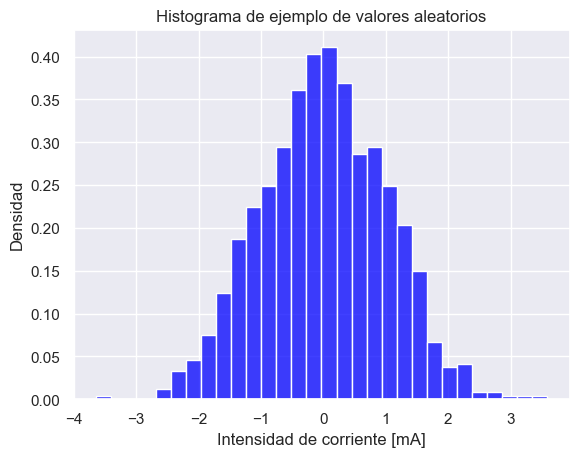

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Datos aleatorios de ejemplo a partir de una distribución normal
X = stats.norm(loc=0, scale=1)
data = X.rvs(size=1000)

# Crear un DataFrame y poner nombre a la columna
df = pd.DataFrame(data, columns=["Valores"])

# Crear un histograma
sns.set_theme()
ax = sns.histplot(df["Valores"], bins=30, color="blue", stat="density")

# Personalizar el gráfico
ax.set_title("Histograma de ejemplo de valores aleatorios")
ax.set_xlabel("Intensidad de corriente [mA]")
ax.set_ylabel("Densidad")

# Guardar la gráfica como SVG
plt.savefig("docs/images/histograma.svg", format="svg")

#### Plotly

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Generar datos de ejemplo como un DataFrame
df = pd.DataFrame({
    "x": np.linspace(0, 10, 100),
    "y": np.sin(np.linspace(0, 10, 100))
})

# Crear un gráfico de dispersión interactivo
fig = px.line(df, x="x", y="y", title="Gráfico de dispersión interactivo con Plotly")
fig.show()

#### Histograma bidimensional con Plotly

In [15]:
import plotly.express as px
import plotly.io as pio
import pandas as pd
from scipy import stats

# Datos aleatorios de ejemplo a partir de una distribución normal
X = stats.norm(loc=162, scale=5)
Y = stats.norm(loc=62, scale=5)
x = X.rvs(size=1000)
y = Y.rvs(size=1000)

# Crear un DataFrame
df = pd.DataFrame({
    "x": x,
    "y": y
})

# Crear un histograma bidimensional
fig = px.density_heatmap(df, x="x", y="y", title="Histograma bidimensional de valores aleatorios")

# Personalizar el gráfico
fig.update_layout(
    xaxis_title="Estatura [cm]",
    yaxis_title="Peso [kg]",
    title="Distribución de ejemplo de estatura y peso",
)
fig.show()

# Guardar la gráfica como SVG
pio.write_image(fig, "docs/images/densidad.svg", format="svg")

## Modelado de datos

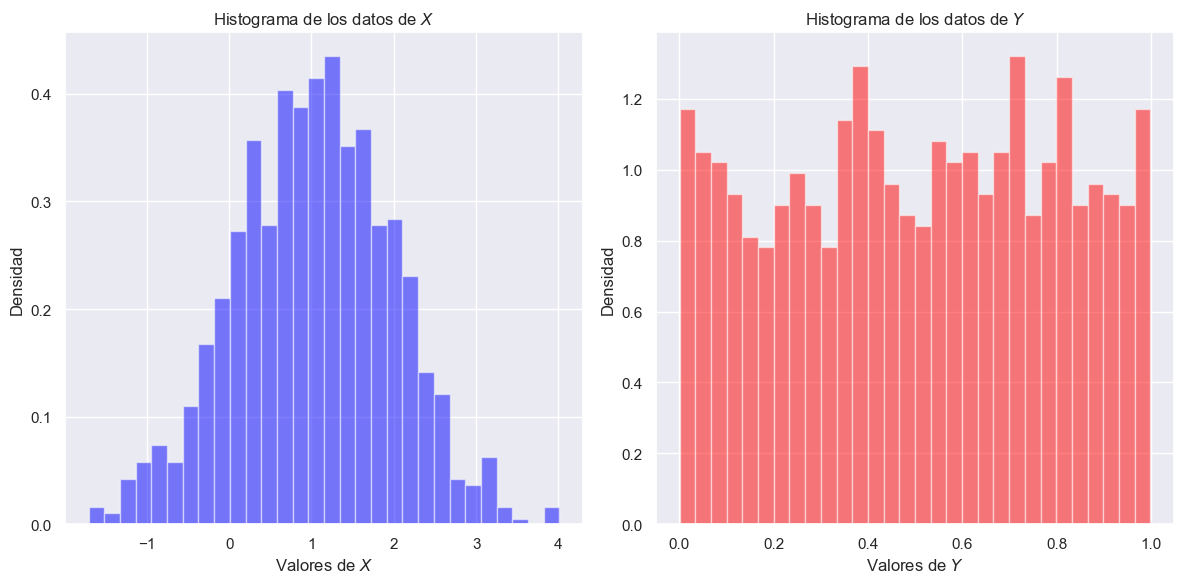

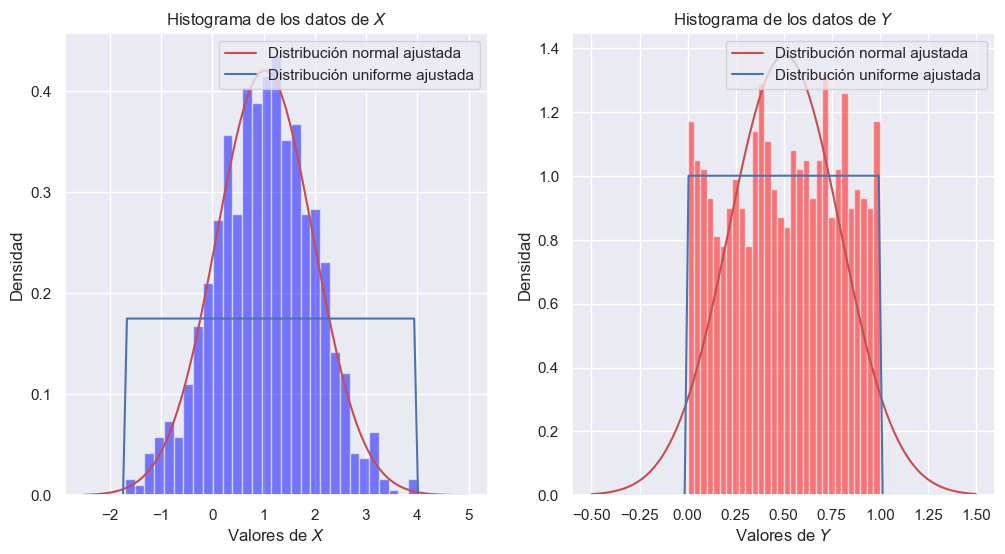

In [32]:
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np

X = norm(loc=1, scale=1)
Y = uniform(loc=0, scale=1)

# Generar datos aleatorios
x = X.rvs(size=1000)
y = Y.rvs(size=1000)

# Crear un gráfico doble con un histograma para cada variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(x, bins=30, density=True, alpha=0.5, color='blue')
ax2.hist(y, bins=30, density=True, alpha=0.5, color='red')
ax1.set_title("Histograma de los datos de $X$")
ax2.set_title("Histograma de los datos de $Y$")
ax1.set_xlabel("Valores de $X$")
ax2.set_xlabel("Valores de $Y$")
ax1.set_ylabel("Densidad")
ax2.set_ylabel("Densidad")
plt.tight_layout()
plt.show()

# Guardar la gráfica como SVG
fig.savefig("docs/images/histograma_doble.svg", format="svg")

# Encontrar los parámetros de las distribución normal
params_X_1 = norm.fit(x)
params_X_2 = uniform.fit(x)
params_Y_1 = norm.fit(y)
params_Y_2 = uniform.fit(y)

# Graficar la distribución normal con los parámetros encontrados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(x, bins=30, density=True, alpha=0.5, color='blue')
ax2.hist(y, bins=30, density=True, alpha=0.5, color='red')
ax1.set_title("Histograma de los datos de $X$")
ax2.set_title("Histograma de los datos de $Y$")
ax1.set_xlabel("Valores de $X$")
ax2.set_xlabel("Valores de $Y$")
ax1.set_ylabel("Densidad")
ax2.set_ylabel("Densidad")
h = np.linspace(-2.5, 5, 100)
H = norm.pdf(h, *params_X_1)
ax1.plot(h, H, 'r-', label='Distribución normal ajustada')
H = uniform.pdf(h, *params_X_2)
ax1.plot(h, H, 'b-', label='Distribución uniforme ajustada')
ax1.legend()
h = np.linspace(-0.5, 1.5, 100)
H = norm.pdf(h, *params_Y_1)
ax2.plot(h, H, 'r-', label='Distribución normal ajustada')
H = uniform.pdf(h, *params_Y_2)
ax2.plot(h, H, 'b-', label='Distribución uniforme ajustada')
ax2.legend()
plt.show()

# Guardar la gráfica como SVG
fig.savefig("docs/images/histograma_doble_ajuste.svg", format="svg")

**Universidad de Costa Rica** | Escuela de Ingeniería Eléctrica

IE0405 - Modelos Probabilísticos de Señales y Sistemas